# Homework 2 - Decision tree

---

## Context

This file is the homework practice from my university course "Fundamentals of
data analytics".
Below are the cover of my analysis.

---

## Homework requirement

* Design features/attributes for your problem and a set of rules to classify
  data
* Use the data generated in step 1 to build a decision tree
* Compare the rules in the decision tree from step 2 and the
  rules you used to generate your ‘right’ data
* Discuss anything you can

---

## Design problem

Imagine the following situation:

A factory is manufacturing the special type of toy block.

The block must satisfy the following specification:

* dimensions(height, width and depth): 0.9~1.1 inches for any dimension
* weight: 0.5~0.8 lbs for any dimension
* color: the color code from 1 to 10

In order to have the good quality product, all the block must pass the quality
control. Anyone that dissatisfy the quality control will be rejected.

The rule of the quality product is listed below:

* The product dimension is 1"x1"x1" inches with tolerance of 0.08 inches
* The weight is between 0.55~0.75 lbs
* It can be any color
* For color 3, it will neglect the rules above and pass the quality control

![right answer flow](images/right_answer_flow.png)

---

## Design database

We have to design the database ourselves. Let's look at the features we have:
* height
* width
* depth
* weight
* color
Now let design the database

First, define the variable to decide whether it needs to create the new
database.

In [1]:
write_database = False

Define the basic class and module to perform

In [2]:
class ToyBlock:
    def __init__(self, height, width, depth, weight, color):
        self.height = height
        self.width = width
        self.depth = depth
        self.weight = weight
        self.color = color
        self.quality = self.quality_control()

    def quality_control(self):
        dimension_satisfy = [0.92, 1.08]
        weight_satisfy = [0.55, 0.75]
        color_satisfy = [1, 10]

        if self.color == 3:
            return 1
        elif self.is_in_range(self.height, dimension_satisfy) and \
             self.is_in_range(self.width, dimension_satisfy) and \
             self.is_in_range(self.depth, dimension_satisfy) and \
             self.is_in_range(self.weight, weight_satisfy) and \
             self.is_in_range(self.color, color_satisfy):
            return 1
        else:
            return 0

    def is_in_range(self, x, r):
        return (r[0] <= x <= r[1])

    def datalist(self):
        return [self.height, self.width, self.depth,
                self.weight, self.color, self.quality]

Creating database

In [3]:
def creating_database(file_name='database.csv', row=10000):
    def random_attribute(x=['int', [1, 10]]):
        import random

        data_type = x[0]
        data_range = x[1]

        if data_type == 'int':
            return random.randint(data_range[0], data_range[1])
        elif data_type=='float':
            return round(random.uniform(data_range[0], data_range[1]), 5)
        return 0

    import csv

    dimension_range = ['float', [0.9, 1.1]]
    weight_range = ['float', [0.5, 0.8]]
    color_range = ['int', [1, 10]]

    with open(file_name, 'w', newline='') as database:
        csv_writer = csv.writer(database)

        csv_writer.writerow(['height', 'width', 'depth',
                             'weight', 'color', 'quality'])

        for _ in range(row):
            toy_block = ToyBlock(random_attribute(dimension_range),
                                 random_attribute(dimension_range),
                                 random_attribute(dimension_range),
                                 random_attribute(weight_range),
                                 random_attribute(color_range))
            csv_writer.writerow(toy_block.datalist())

if write_database:
    import os

    if not os.path.exists('input'):
        os.makedirs('input')
    creating_database('input/database.csv', 100000)

---

## Import Library And Dataset

Import Library

In [4]:
from IPython.display import Image
import numpy as np
import pandas as pd
import pydotplus
from sklearn.externals.six import StringIO
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

Import dataset

In [5]:
dataset = pd.read_csv('input/database.csv')
dataset.head()

,height,width,depth,weight,color,quality
0,0.94704,1.00909,0.96897,0.50851,9,0
1,1.02792,1.00470,1.07333,0.51777,8,0
2,0.97650,1.02816,1.08199,0.55087,10,0
3,0.98168,0.94955,1.05328,0.55498,10,1
4,0.93911,1.06875,0.95818,0.71408,8,1


---

## Basic dataset info

Below shows the basic info of the dataset. Remember that these info may vary
depending on the database.

In [6]:
def info():
    dataset_count = dataset.shape[0]
    print('Total amount of the block in the dataset:', dataset_count)

    percentage = pd.DataFrame(dataset.groupby(['quality'])['quality'].count())

    percentage.rename(index={0: 'Reject', 1: 'Pass'}, inplace=True)
    percentage.plot(kind='pie', subplots=True, figsize=(12,10),
                    title='Overall Pass Rate')

info()

Total amount of the block in the dataset: 100000


---

## Separate attribute and answer

In [7]:
answer = dataset['quality'].to_numpy()
attribute = dataset.drop(columns='quality')

---

## Build Decision Tree

Now the database is ready. It is time to build the decision tree.

First, make some module for later uses.

In [8]:
def generate_decision_tree(data, right_answer,
                           max_depth=None, max_leaf_nodes=None):
    decision_tree = DecisionTreeClassifier(max_depth=max_depth,
                                           max_leaf_nodes=max_leaf_nodes)
    decision_tree.fit(data, right_answer)
    return decision_tree

def get_graph_from_decision_tree(tree):
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data, feature_names=list(attribute),
                    class_names=['reject', 'pass'], filled=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

def write_pdf(graph, filename='decision_tree.pdf'):
    graph.write_pdf(filename)

def display_image(graph):
    return Image(graph.create_png())

Now let make a decision tree and record it on the pdf file.
Then test the accuracy of the tree and print out the feature importance.

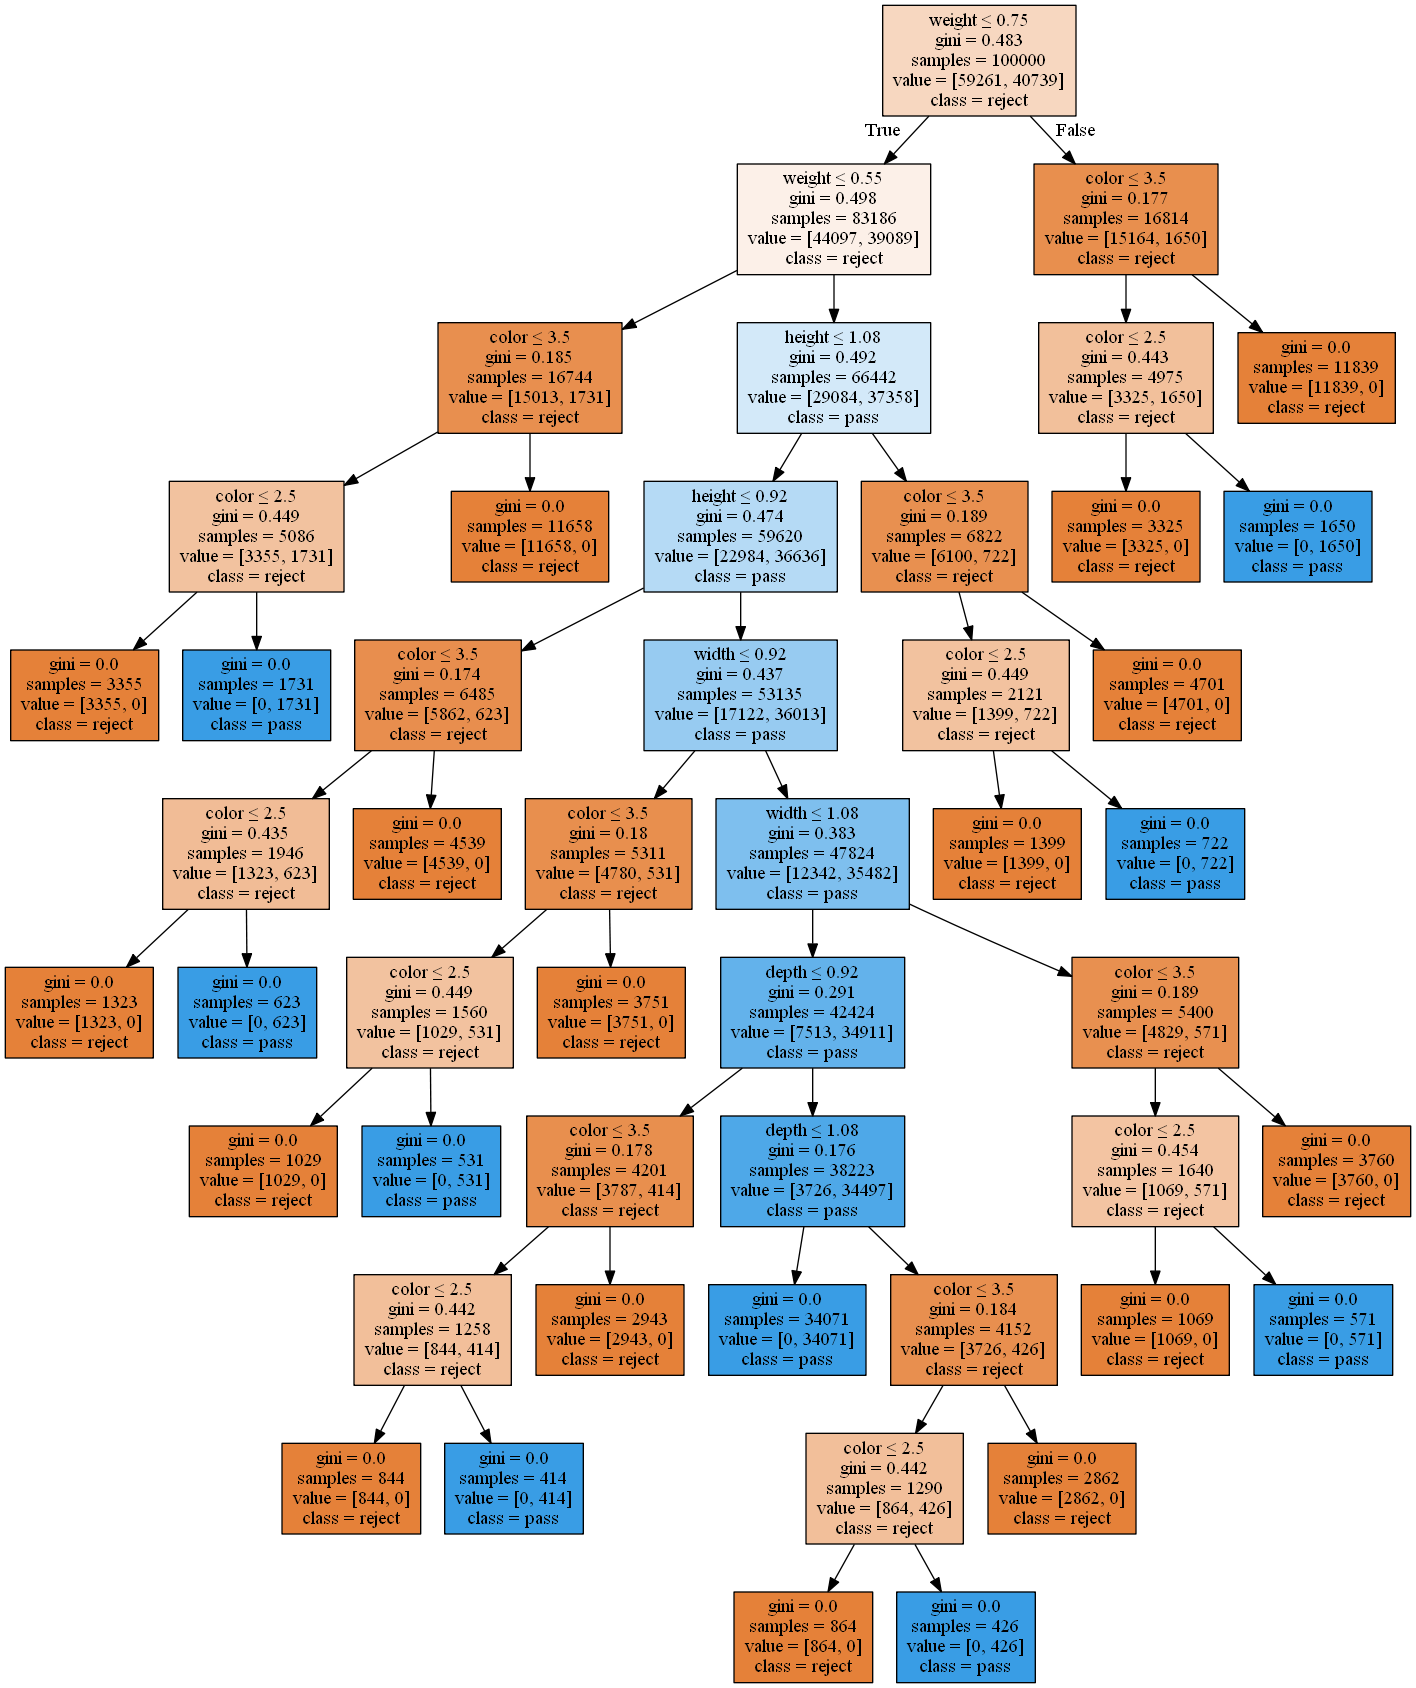

In [9]:
perfect_tree = generate_decision_tree(attribute, answer)
graph = get_graph_from_decision_tree(perfect_tree)
write_pdf(graph, 'images/decision_tree.pdf')
display_image(graph)

In [10]:
perfect_tree_accuracy = accuracy_score(answer, perfect_tree.predict(attribute))
print('Accuracy : {0:.5}%'.format(perfect_tree_accuracy * 100))

Accuracy : 100.0%


In [11]:
perfect_tree.feature_importances_

array([0.14660943, 0.18364614, 0.22479206, 0.19672072, 0.24823165])

You can see the accuracy is really high in this case.

---

## Different decision tree parameters

We see the decision tree. Now let's restrict some parameters to see if it
affect the result

### Max depth

Restrict the max depth of the decision tree from 4 to 10 and show its accuracy.
Below are the accuracies of the samples.

In [12]:
accuracies = []
for depth in range(4, 11):
    tree = generate_decision_tree(attribute, answer, max_depth=depth)
    accuracy = accuracy_score(answer, tree.predict(attribute))
    accuracies.append([depth, accuracy])

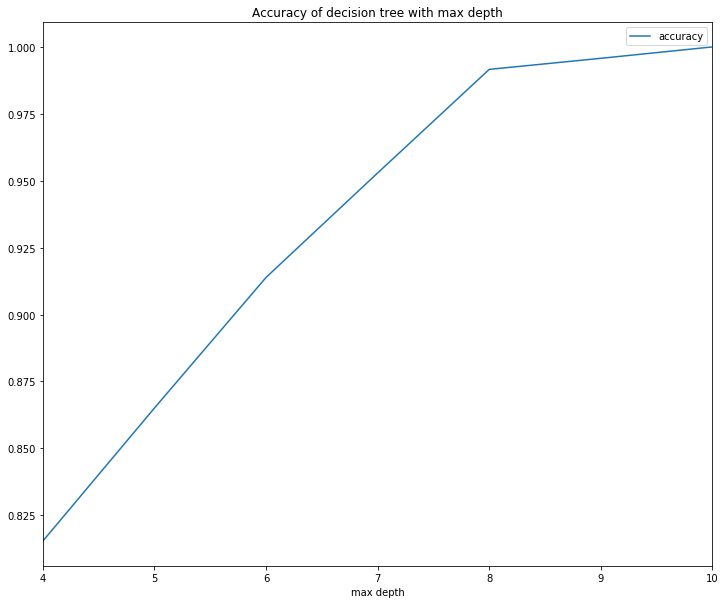

In [13]:
accuracy_plot = pd.DataFrame(np.array(accuracies),
                             columns=['max depth', 'accuracy'])

accuracy_plot.plot(kind='line', x='max depth', y='accuracy', figsize=(12,10),
                   subplots=False,
                   title='Accuracy of decision tree with max depth')

It show that the deeper the tree is, the more accurate the prediction predict.

### Max leaf node

Restrict the max leaf node of the decision tree from 4 to 15 and show its
accuracy.
Below are the accuracies of the samples.

In [14]:
accuracies = []
for leaf_node in range(4, 16):
    tree = generate_decision_tree(attribute, answer, max_leaf_nodes=leaf_node)
    accuracy = accuracy_score(answer, tree.predict(attribute))
    accuracies.append([leaf_node, accuracy])

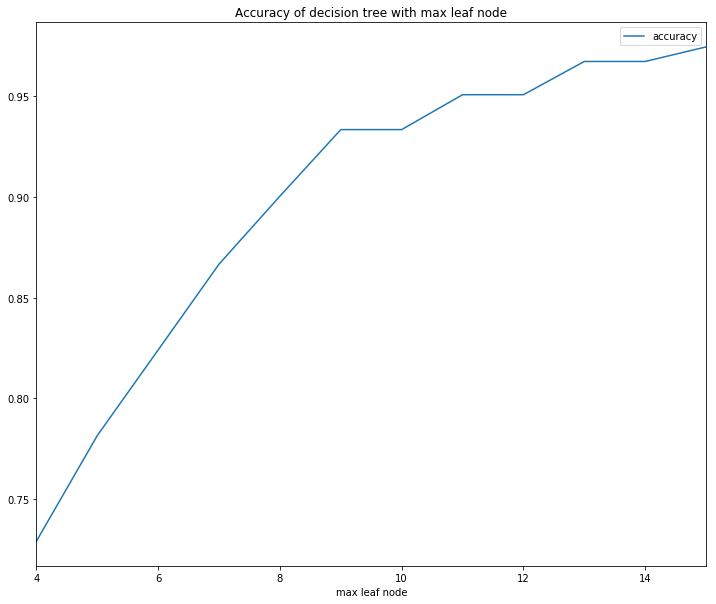

In [15]:
accuracy_plot = pd.DataFrame(np.array(accuracies),
                             columns=['max leaf node', 'accuracy'])

accuracy_plot.plot(kind='line', x='max leaf node', y='accuracy',
                   figsize=(12,10), subplots=False,
                   title='Accuracy of decision tree with max leaf node')

More leaf means more accurate the result is.

### Training data amount

Restrict the training data amount of the decision tree and show its accuracy.
Below are the accuracies of the samples.

In [16]:
data_count = 50
progression = 50
dataset_size = dataset.shape[0]
accuracies = []

while(data_count <= dataset.shape[0]):
    tree = generate_decision_tree(attribute.head(data_count),
                                  answer[:data_count])
    accuracy = accuracy_score(answer, tree.predict(attribute))
    if accuracy >= 0.98:
        break
    accuracies.append([data_count, accuracy])
    data_count = data_count + progression

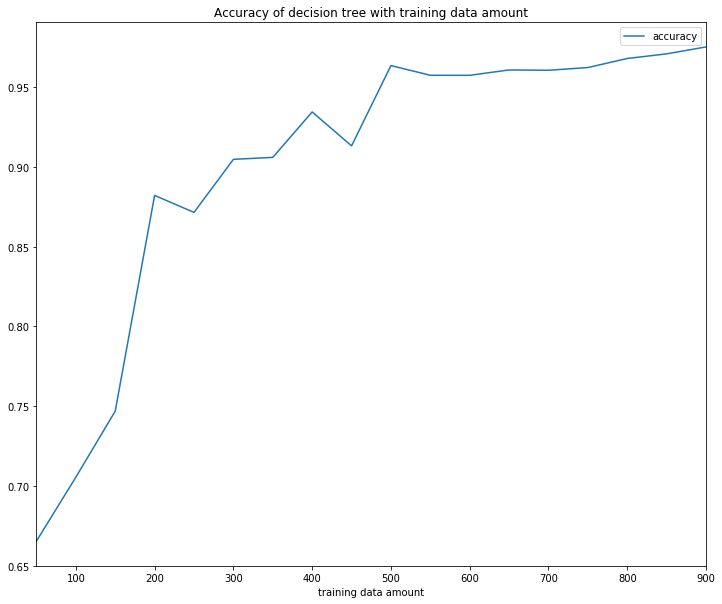

In [17]:
accuracy_plot = pd.DataFrame(np.array(accuracies),
                             columns=['training data amount', 'accuracy'])

accuracy_plot.plot(kind='line', x='training data amount', y='accuracy',
                   figsize=(12,10), subplots=False, legend='reverse',
                   title='Accuracy of decision tree with training data amount')

Since the accuracy is rising, we can say that more training data means more
accurate the decision tree is.